In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
import seaborn as sns

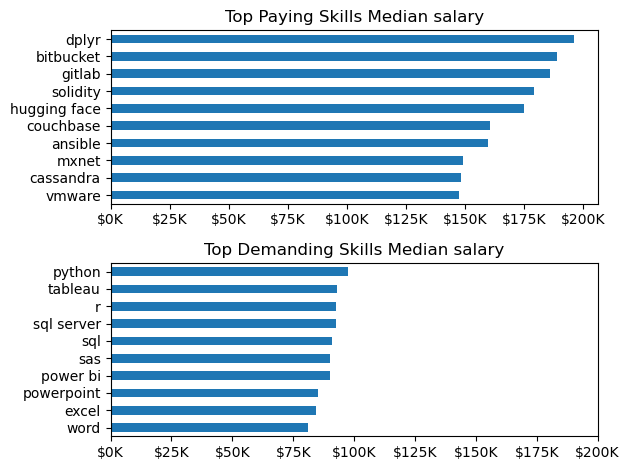

In [4]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset= 'salary_year_avg')

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_US_TopDemand =df_DA_US_group.sort_values(by=['count'],ascending=False).head(10).sort_values(by=['median'],ascending=False)

df_DA_US_TopPay =df_DA_US_group.sort_values(by=['median'],ascending=False).head(10)

fig , ax = plt.subplots(2,1)

df_DA_US_TopPay.plot(kind='barh',y='median' ,ax=ax[0],legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top Paying Skills Median salary')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_ : f'${int(x/1000)}K'))
ax[0].set_ylabel('')

df_DA_US_TopDemand.plot(kind='barh',y='median' ,ax=ax[1],legend=False)
ax[1].invert_yaxis()
ax[1].set_title('Top Demanding Skills Median salary')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_ : f'${int(x/1000)}K'))
ax[1].set_ylabel('')


plt.xlim(0,200000)
plt.tight_layout()
plt.show()

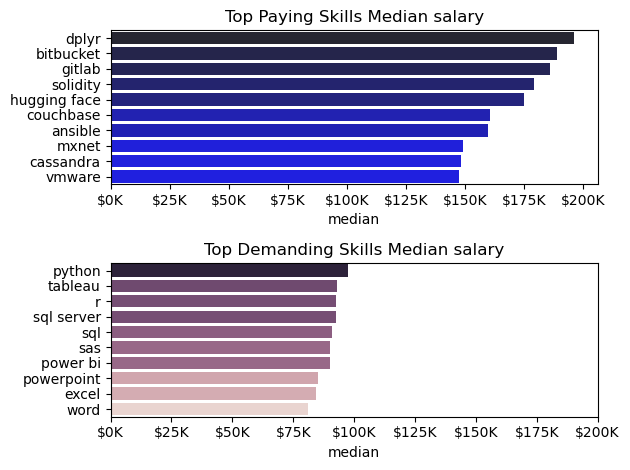

In [20]:
fig , ax = plt.subplots(2,1)
sns.barplot(x='median',y=df_DA_US_TopPay.index,data=df_DA_US_TopPay,ax=ax[0],hue='median',palette='dark:b_r')
# df_DA_US_TopPay.plot(kind='barh',y='median' ,ax=ax[0],legend=False)
# ax[0].invert_yaxis()
ax[0].legend().remove()
ax[0].set_title('Top Paying Skills Median salary')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_ : f'${int(x/1000)}K'))
ax[0].set_ylabel('')


sns.barplot(x='median',y=df_DA_US_TopDemand.index,data=df_DA_US_TopDemand,ax=ax[1],hue='median')
# df_DA_US_TopDemand.plot(kind='barh',y='median' ,ax=ax[1],legend=False)
# ax[1].invert_yaxis()
ax[1].legend().remove()
ax[1].set_title('Top Demanding Skills Median salary')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_ : f'${int(x/1000)}K'))
ax[1].set_ylabel('')


plt.xlim(0,200000)
plt.tight_layout()
plt.show()